In [1]:
import numpy as np
import pandas as pd

In [2]:
dataframe=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/daily-total-female-births-CA.csv')

In [3]:
dataframe.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
dataframe['date'].dtype

dtype('O')

In [5]:
df2=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/daily-total-female-births-CA.csv', header=0, parse_dates=[0])

In [6]:
df2.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df2['date'].dtype

dtype('<M8[ns]')

In [9]:
series=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

In [10]:
series

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: births, Length: 365, dtype: int64

In [11]:
series.shape

(365,)

In [12]:
df2.shape

(365, 2)

In [13]:
series['1959-01']

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64

In [14]:
df2[(df2['date']>'1959-01-01')&(df2['date']<='1959-01-21')]

,date,births
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27
10,1959-01-11,38


In [15]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [16]:
df2.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [17]:
df2.head(5)

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [18]:
features=df2.copy()

In [19]:
features['year']=df2['date'].dt.year
features['month']=df2['date'].dt.month
features['day']=df2['date'].dt.day
features

,date,births,year,month,day
0,1959-01-01,35,1959,1,1
1,1959-01-02,32,1959,1,2
2,1959-01-03,30,1959,1,3
3,1959-01-04,31,1959,1,4
4,1959-01-05,44,1959,1,5
...,...,...,...,...,...
360,1959-12-27,37,1959,12,27
361,1959-12-28,52,1959,12,28
362,1959-12-29,48,1959,12,29
363,1959-12-30,55,1959,12,30


In [20]:
features['lag1']=df2['births'].shift(1)

In [21]:
features['lag2']=df2['births'].shift(365)

In [22]:
features.head(5)

,date,births,year,month,day,lag1,lag2
0,1959-01-01,35,1959,1,1,NaN,NaN
1,1959-01-02,32,1959,1,2,35.0,NaN
2,1959-01-03,30,1959,1,3,32.0,NaN
3,1959-01-04,31,1959,1,4,30.0,NaN
4,1959-01-05,44,1959,1,5,31.0,NaN


In [23]:
features['Roll_mean']=df2['births'].rolling(window=3).mean()

In [24]:
features['Expand_mean']=df2['births'].expanding().mean()

In [25]:
features

,date,births,year,month,day,lag1,lag2,Roll_mean,Expand_mean
0,1959-01-01,35,1959,1,1,NaN,NaN,NaN,35.000000
1,1959-01-02,32,1959,1,2,35.0,NaN,NaN,33.500000
2,1959-01-03,30,1959,1,3,32.0,NaN,32.333333,32.333333
3,1959-01-04,31,1959,1,4,30.0,NaN,31.000000,32.000000
4,1959-01-05,44,1959,1,5,31.0,NaN,35.000000,34.400000
...,...,...,...,...,...,...,...,...,...
360,1959-12-27,37,1959,12,27,34.0,NaN,38.333333,41.878116
361,1959-12-28,52,1959,12,28,37.0,NaN,41.000000,41.906077
362,1959-12-29,48,1959,12,29,52.0,NaN,45.666667,41.922865
363,1959-12-30,55,1959,12,30,48.0,NaN,51.666667,41.958791


In [27]:
miles_df=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [28]:
miles_df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [29]:
quarterly_miles_df=miles_df.resample('Q', on='Month').mean()

In [30]:
yearly_total_miles_df=miles_df.resample('A', on='Month').sum()

In [31]:
yearly_total_miles_df

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515
1968-12-31,128975
1969-12-31,143664
1970-12-31,157497


In [32]:
upsamples_miles_df=miles_df.resample('D', on='Month').mean()

In [33]:
upsamples_miles_df

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
...,...
1970-11-27,NaN
1970-11-28,NaN
1970-11-29,NaN


In [34]:
interpolated_miles_df=upsamples_miles_df.interpolate(method='linear')

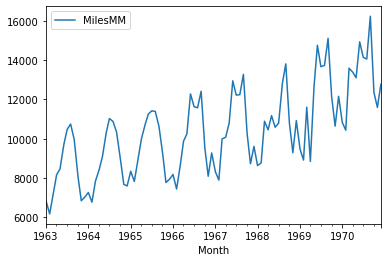

In [35]:
interpolated_miles_df.plot()

In [36]:
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
Dataviz_df=df2.copy()

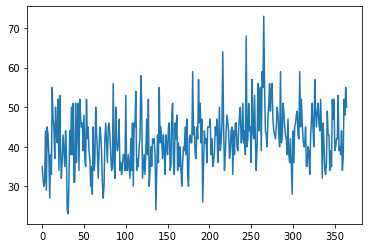

In [38]:
Dataviz_df['births'].plot()

In [39]:
Dataviz_df.index=Dataviz_df['date']

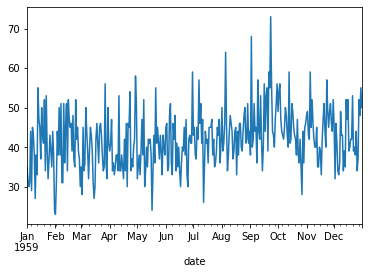

In [40]:
Dataviz_df['births'].plot()

In [41]:
Dataviz_df2=Dataviz_df[(Dataviz_df['date']>'1959-01-01') & (Dataviz_df['date']<='1959-01-10')].copy()

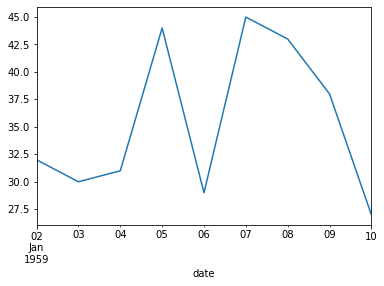

In [42]:
Dataviz_df2['births'].plot()

In [43]:
import seaborn as sns

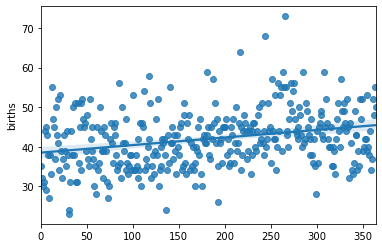

In [44]:
sns.regplot(x=df2.index.values, y=df2['births'])

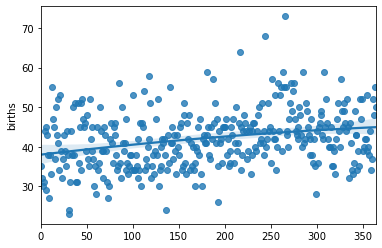

In [45]:
sns.regplot(x=df2.index.values, y=df2['births'], order=2)

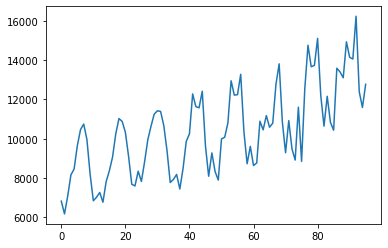

In [46]:
miles_df['MilesMM'].plot()

In [47]:
from pandas.plotting import lag_plot

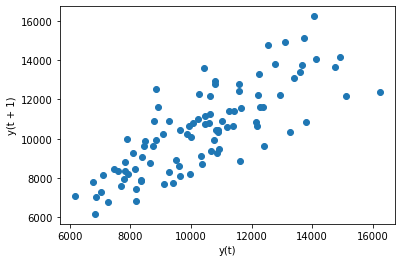

In [48]:
lag_plot(miles_df['MilesMM'])

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
miles_decompose_df=miles_df.copy()

In [51]:
miles_decompose_df.index=miles_decompose_df['Month']

In [52]:
result=seasonal_decompose(miles_decompose_df['MilesMM'], model='additive')

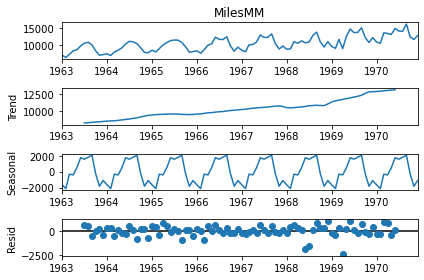

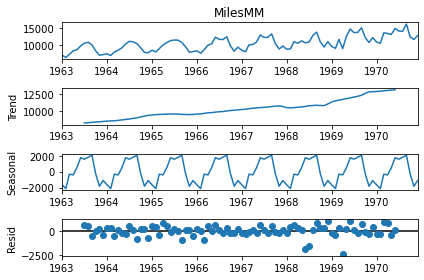

In [53]:
result.plot()

In [54]:
miles_df

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462
...,...,...
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595


In [55]:
miles_df['lag1']=miles_df['MilesMM'].shift(1)

In [56]:
miles_df['MilesMM_diff_1']=miles_df['MilesMM'].diff(periods=1)

In [57]:
miles_df

,Month,MilesMM,lag1,MilesMM_diff_1
0,1963-01-01,6827,NaN,NaN
1,1963-02-01,6178,6827.0,-649.0
2,1963-03-01,7084,6178.0,906.0
3,1963-04-01,8162,7084.0,1078.0
4,1963-05-01,8462,8162.0,300.0
...,...,...,...,...
91,1970-08-01,14057,14147.0,-90.0
92,1970-09-01,16234,14057.0,2177.0
93,1970-10-01,12389,16234.0,-3845.0
94,1970-11-01,11595,12389.0,-794.0


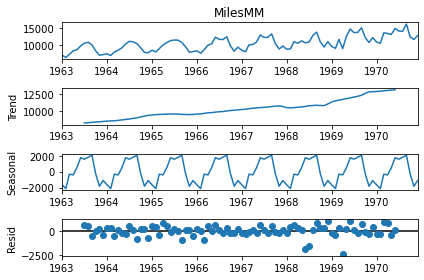

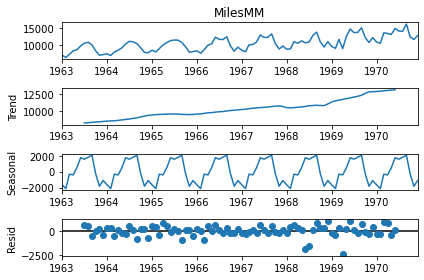

In [58]:
miles_df.index=miles_df['Month']
result_a=seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

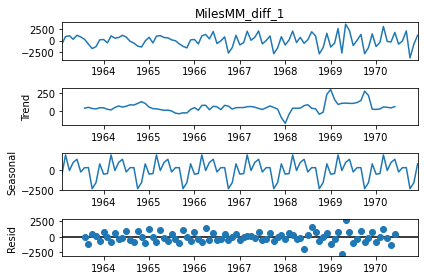

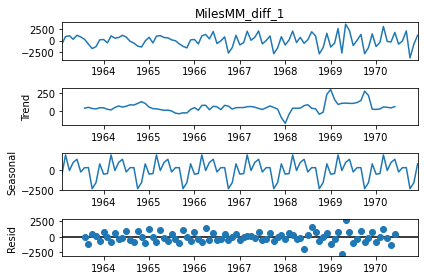

In [59]:
miles_df.index=miles_df['Month']
result_b=seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

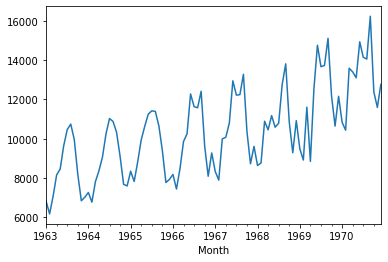

In [60]:
miles_df['MilesMM'].plot()

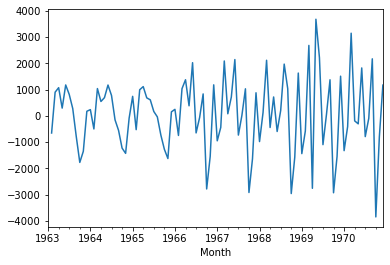

In [61]:
miles_df['MilesMM_diff_1'].plot()

In [62]:
miles_df['Miles_MM_diff_12']=miles_df['MilesMM_diff_1'].diff(periods=12)

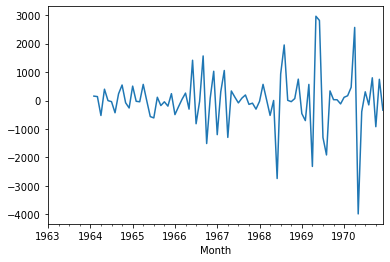

In [63]:
miles_df['Miles_MM_diff_12'].plot()

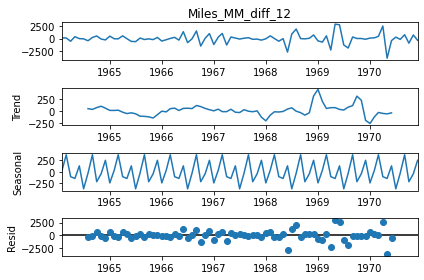

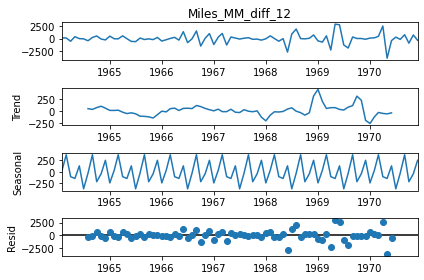

In [64]:
result_c=seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [65]:
df=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/daily-min-temperatures.csv', header=0, parse_dates=[0])

In [66]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [67]:
df['t']=df['Temp'].shift(1)

In [68]:
df.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


In [69]:
train, test=df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [70]:
train_X, train_y=train['t'], train['Temp']
test_X, test_y=test['t'], test['Temp']

In [71]:
predictions=test_X.copy()

In [72]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [73]:
from matplotlib import pyplot

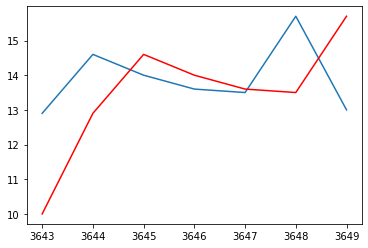

In [74]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [75]:
from statsmodels.tsa.ar_model import AR

In [76]:
train, test=df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [77]:
model=AR(train)
model_fit=model.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [78]:
model_fit.k_ar

29

In [79]:
model_fit.params

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

In [80]:
predictions_AR=model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [81]:
predictions_AR

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [82]:
mse_AR=mean_squared_error(test_y,predictions_AR)

In [83]:
mse_AR

1.5015252310070057

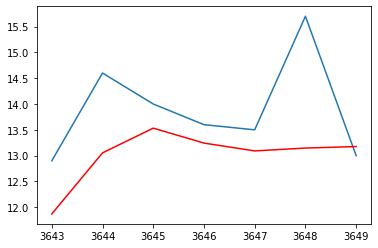

In [84]:
pyplot.plot(test_y)
pyplot.plot(predictions_AR, color='red')

In [85]:
data=train
predict=[]
for t in test:
    model=AR(data)
    model_fit=model.fit()
    y=model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data=np.append(data, t)
    data=pd.Series(data)

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


11.871274847727832
13.660699943835159
14.353164144090185
13.430120791626996
13.374756477185109
13.479111299420527
14.767773018439865


In [86]:
mse_CV=mean_squared_error(test.values, predict)

In [87]:
mse_CV

1.4524568425185298

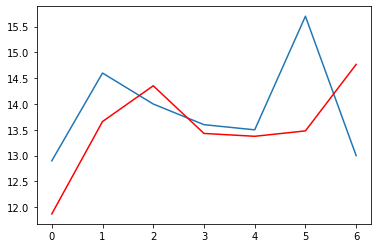

In [88]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

In [89]:
df_s=pd.read_csv('C:/Users/shyam/Downloads/Data (1)/shampoo.csv', header=0, parse_dates=[0])

In [90]:
df_s.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


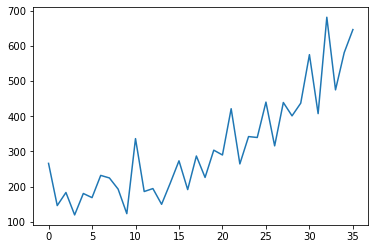

In [91]:
df_s['Sales'].plot()

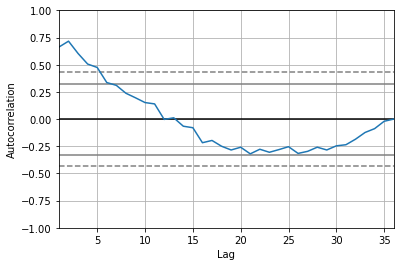

In [92]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_s['Sales'])

In [93]:
from statsmodels.graphics.tsaplots import plot_pacf

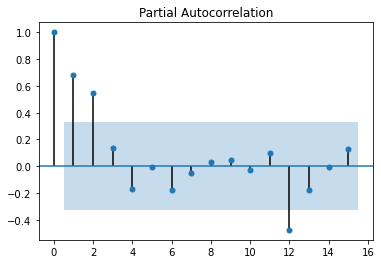

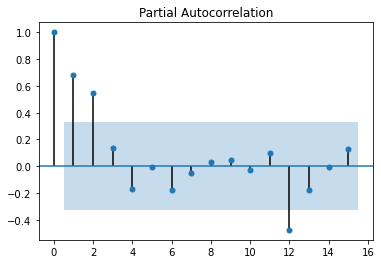

In [94]:
plot_pacf(df_s['Sales'], lags=15)

In [95]:
from statsmodels.tsa.arima_model import ARIMA

In [98]:
model_arima=ARIMA(df_s['Sales'], order= (5,2,2))

In [99]:
model_arima_fit=model_arima.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:714: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\

LinAlgError: SVD did not converge

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [103]:
miles_df

,Month,MilesMM,lag1,MilesMM_diff_1,Miles_MM_diff_12
Month,,,,,
1963-01-01,1963-01-01,6827,NaN,NaN,NaN
1963-02-01,1963-02-01,6178,6827.0,-649.0,NaN
1963-03-01,1963-03-01,7084,6178.0,906.0,NaN
1963-04-01,1963-04-01,8162,7084.0,1078.0,NaN
1963-05-01,1963-05-01,8462,8162.0,300.0,NaN
...,...,...,...,...,...
1970-08-01,1970-08-01,14057,14147.0,-90.0,-154.0
1970-09-01,1970-09-01,16234,14057.0,2177.0,798.0
1970-10-01,1970-10-01,12389,16234.0,-3845.0,-920.0


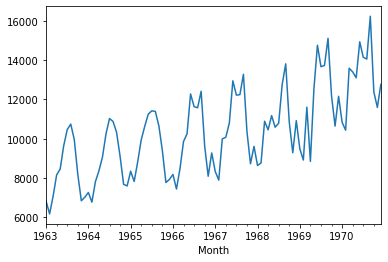

In [112]:
miles_df['MilesMM'].plot()

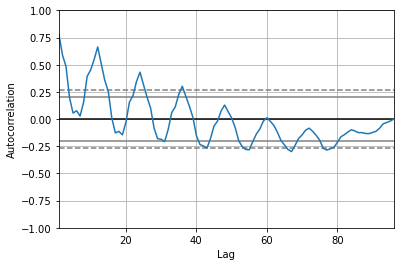

In [113]:
autocorrelation_plot(miles_df['MilesMM'])

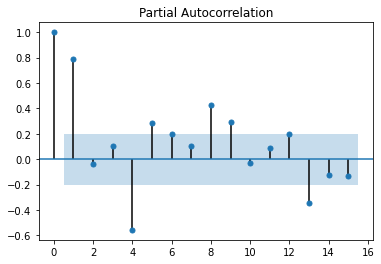

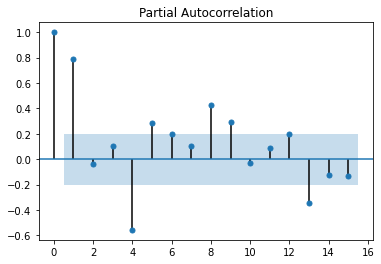

In [115]:
plot_pacf(miles_df['MilesMM'], lags=15)

In [104]:
model_sarimax=SARIMAX(miles_df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [105]:
model_s_fit=model_sarimax.fit()

C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\shyam\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [106]:
residuals=model_s_fit.resid

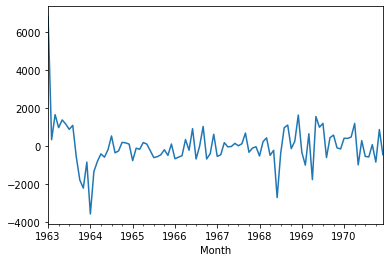

In [107]:
residuals.plot()

In [108]:
output=model_s_fit.forecast()

In [109]:
output

1971-01-01    11508.1094
Freq: MS, dtype: float64

In [111]:
model_s_fit.forecast(12)

1971-01-01    11508.109400
1971-02-01    11236.733142
1971-03-01    13721.589590
1971-04-01    12768.637176
1971-05-01    14322.042791
1971-06-01    15764.970911
1971-07-01    14987.734678
1971-08-01    15391.303553
1971-09-01    16940.712478
1971-10-01    13653.551972
1971-11-01    12428.494786
1971-12-01    13725.518656
Freq: MS, dtype: float64